In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
print(os.getcwd())
os.chdir('C:/Users/Cheng/OneDrive/Documents/Proj/VarianceArithemtic/Java/docs')
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb
C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\Java\docs


In [3]:
df = pd.read_csv("../output/SinVar.txt", sep='\t')
df.head()

,NoiseType,Noise,X,sin,Error Deviation,Error Minimum,Error Maximum,Value Deviation,Uncertainty,Mean,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
0,Gaussian,0.2,-1.000000,-1.224650e-16,0.993883,-3.36468,4.01564,0.194867,0.196066,0.001547,...,0.000300,0.000100,0.0001,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000
1,Gaussian,0.2,-0.916667,-2.588190e-01,0.993927,-3.02294,4.53645,0.188370,0.189521,0.006555,...,0.000200,0.000200,0.0002,0.0001,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000
2,Gaussian,0.2,-0.833333,-5.000000e-01,0.993950,-2.62428,5.12778,0.169333,0.170363,0.011116,...,0.000900,0.000300,0.0002,0.0001,0.0002,0.0001,0.0000,0.0000,0.0000,0.0001
3,Gaussian,0.2,-0.750000,-7.071070e-01,0.993933,-2.07674,5.91265,0.139170,0.140019,0.014920,...,0.001300,0.001000,0.0005,0.0002,0.0001,0.0001,0.0002,0.0000,0.0001,0.0000
4,Gaussian,0.2,-0.666667,-8.660250e-01,0.993784,-1.32739,7.19071,0.100303,0.100930,0.017707,...,0.002101,0.001801,0.0013,0.0008,0.0005,0.0003,0.0001,0.0001,0.0001,0.0001


In [4]:
sorted(df['Noise'].unique())

[0.01, 0.02, 0.05, 0.1, 0.2]

# Deviation vs Uncertainty

In [5]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=sorted(df['Noise'].unique()), noiseType='Gaussian',
                sStyle=['x', '-', '--', '+'], sColor = ['r','g','b','y','c','m']):
    fig, ax = plt.subplots()
    ax.set_title('sin(x +/- noise)')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}')
    ax.legend(bbox_to_anchor=(1.1, 1.05))

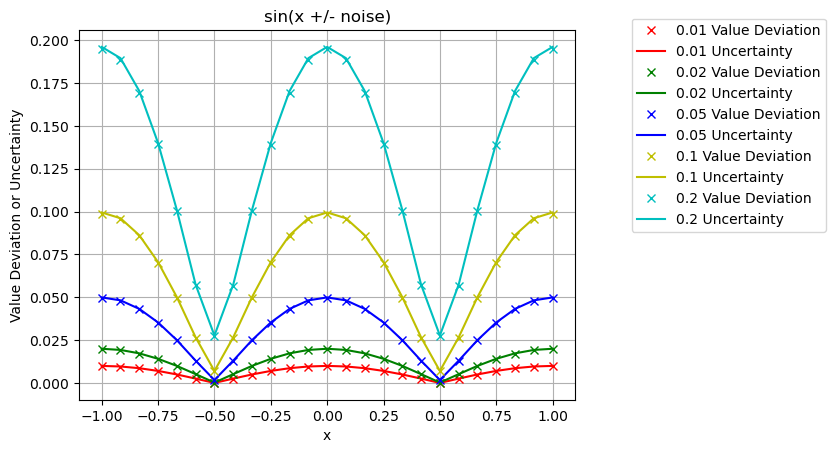

In [6]:
PlotValues()

In [7]:
def PlotErrorDev( noiseType='Gaussian', sNoise=sorted(df['Noise'].unique()),
                  sColor = ['r','g','b','y','c','m'] ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$\sin(x \pm \delta x)$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_ylabel('Uncertainty or Value Deviation')
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax.legend(bbox_to_anchor=(1.57, 1.0))
    ax2.legend(bbox_to_anchor=(1.57, 0.3))

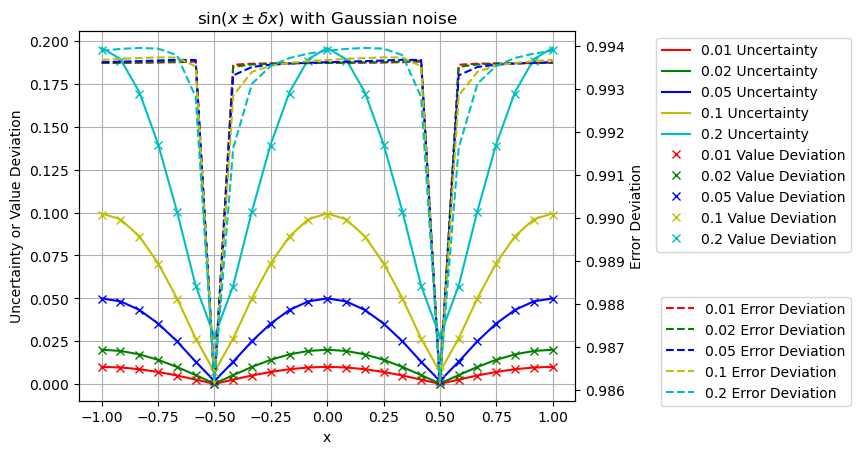

In [8]:
PlotErrorDev()

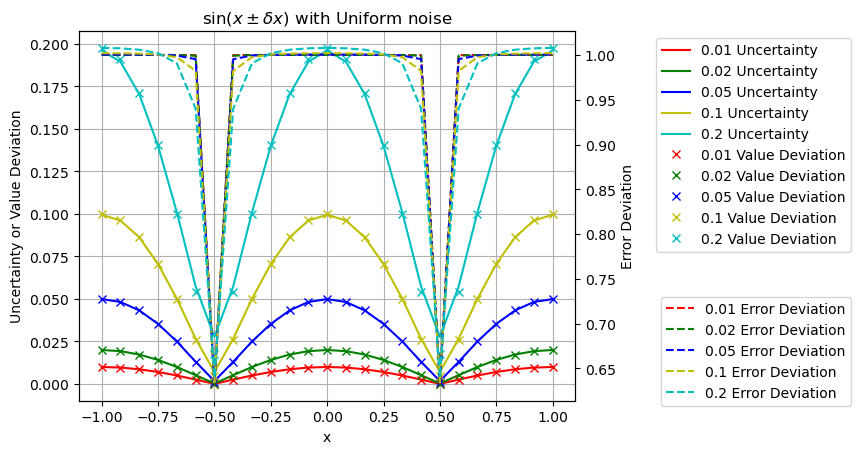

In [9]:
PlotErrorDev('Uniform')

# Mean vs Bias

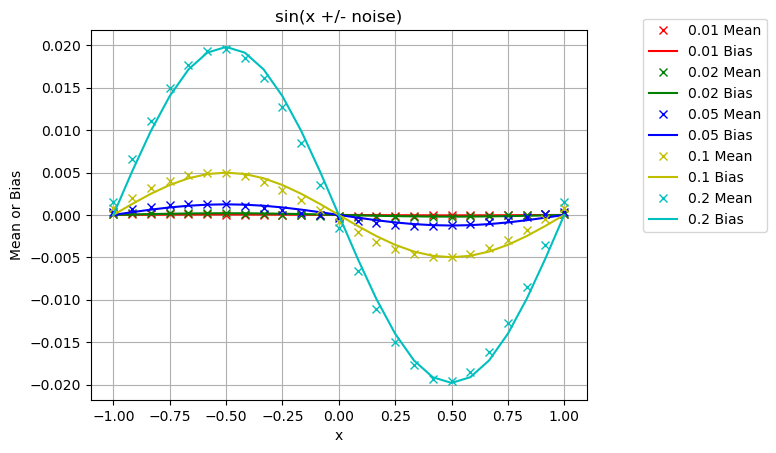

In [10]:
PlotValues(sValue=['Mean', 'Bias'])

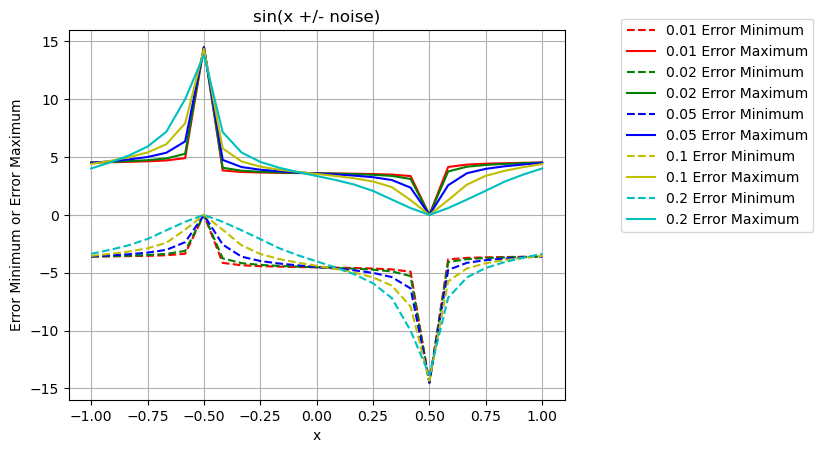

In [11]:
PlotValues(sValue=['Error Minimum', 'Error Maximum'], sStyle=['--', '-'])

# Histogram

In [12]:
sHisto = [str(i/10) for i in range(-30, 32, 2)]
df[sHisto].head()

,-3.0,-2.8,-2.6,-2.4,-2.2,-2.0,-1.8,-1.6,-1.4,-1.2,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.0003,0.0016,0.0035,0.0038,0.0083,0.011900,0.015700,0.021100,0.031900,0.035500,...,0.038900,0.031700,0.023900,0.017800,0.012700,0.006000,0.004000,0.002700,0.001200,0.000200
1,0.0004,0.0006,0.0024,0.0036,0.0070,0.010200,0.016400,0.021200,0.033100,0.038000,...,0.037600,0.029000,0.024800,0.016100,0.014400,0.007600,0.004400,0.003400,0.001700,0.001100
2,0.0000,0.0001,0.0008,0.0022,0.0051,0.009900,0.015700,0.021000,0.035500,0.041000,...,0.035100,0.028700,0.022800,0.017100,0.013700,0.009600,0.005100,0.003400,0.002400,0.001700
3,0.0000,0.0000,0.0000,0.0000,0.0010,0.006501,0.013501,0.024602,0.035403,0.046305,...,0.032703,0.025903,0.023202,0.016302,0.013701,0.010701,0.006501,0.004000,0.002700,0.002400
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.007102,0.046614,0.061818,...,0.030109,0.023907,0.021206,0.015705,0.011904,0.010503,0.008803,0.005402,0.003601,0.002001


In [13]:
def PlotHisto( sNoiseType=['Uniform'], sNoise=df['Noise'].unique(), sX=df['X'].unique() ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot()
    ax.legend(bbox_to_anchor=(1.1, 1.05))    


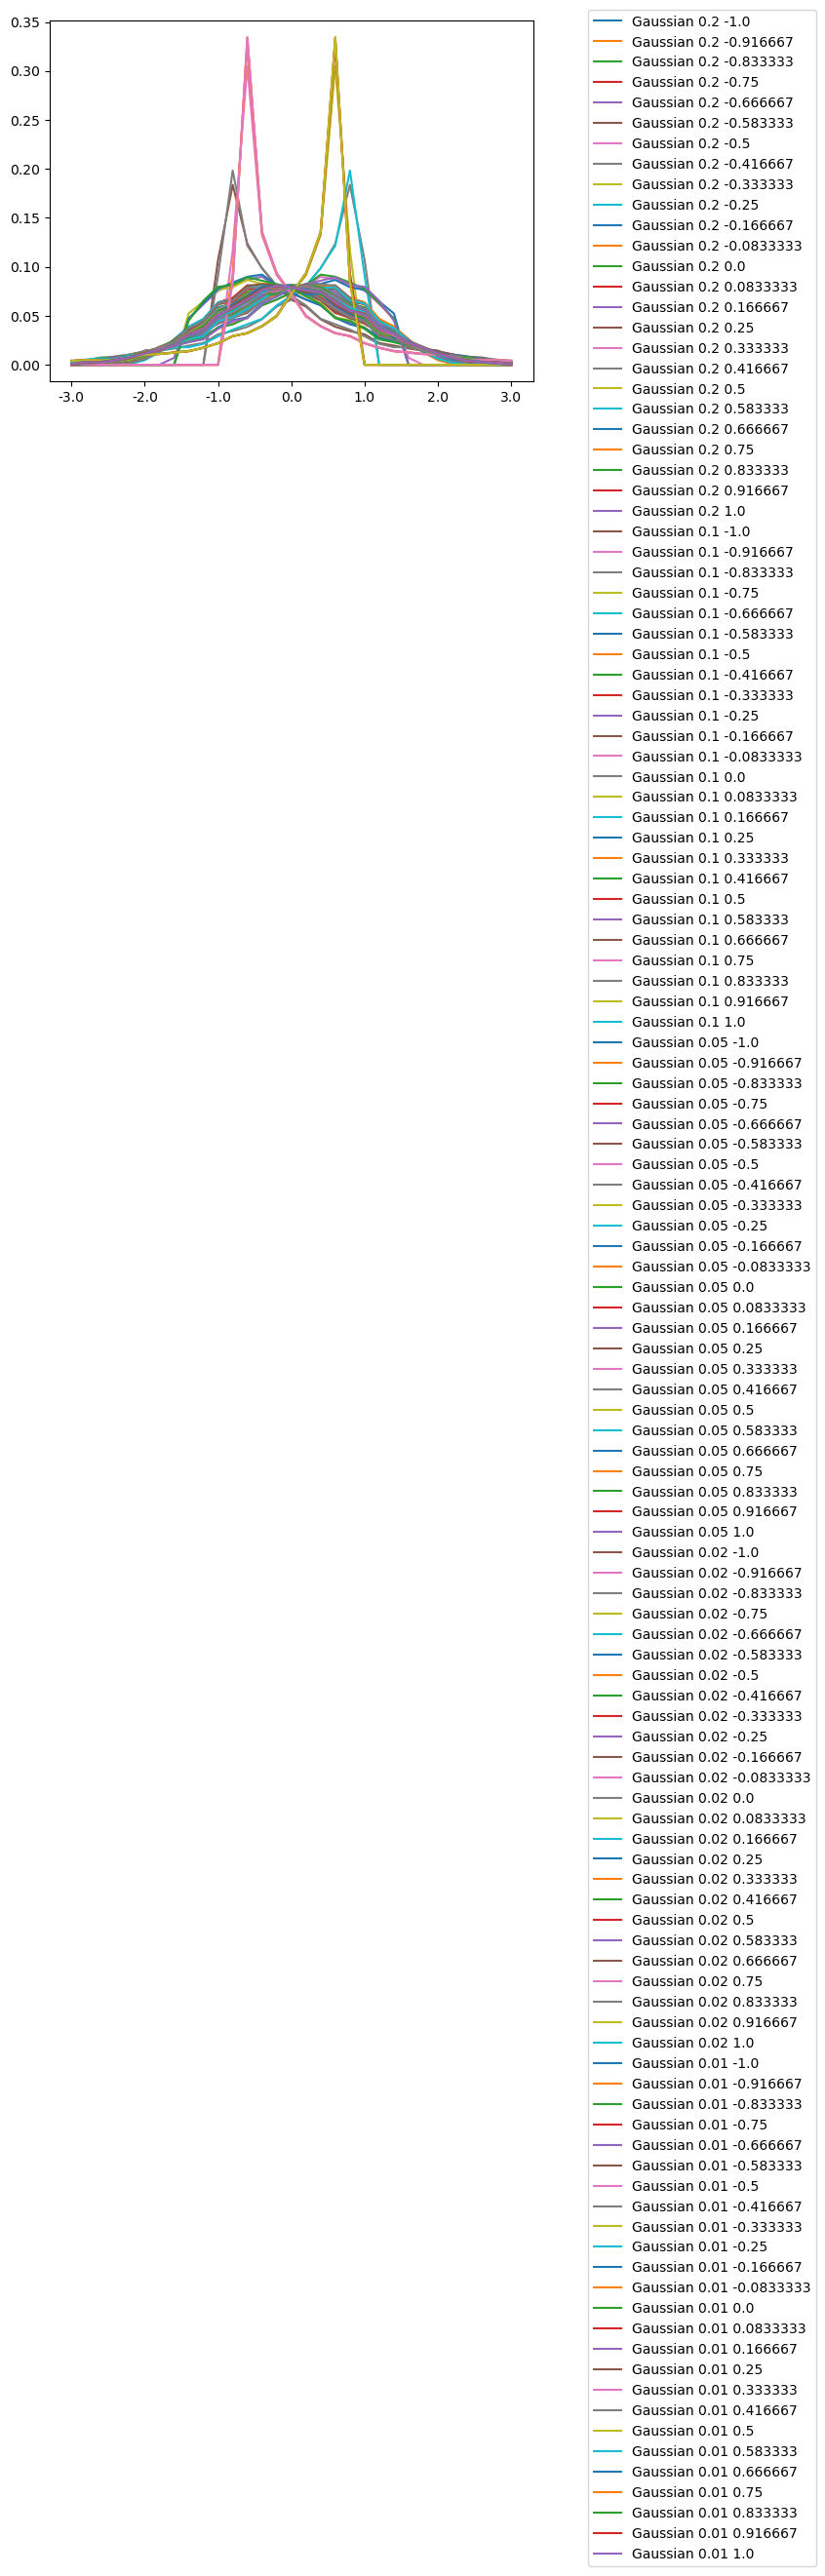

In [14]:
PlotHisto(sNoiseType=['Gaussian'])

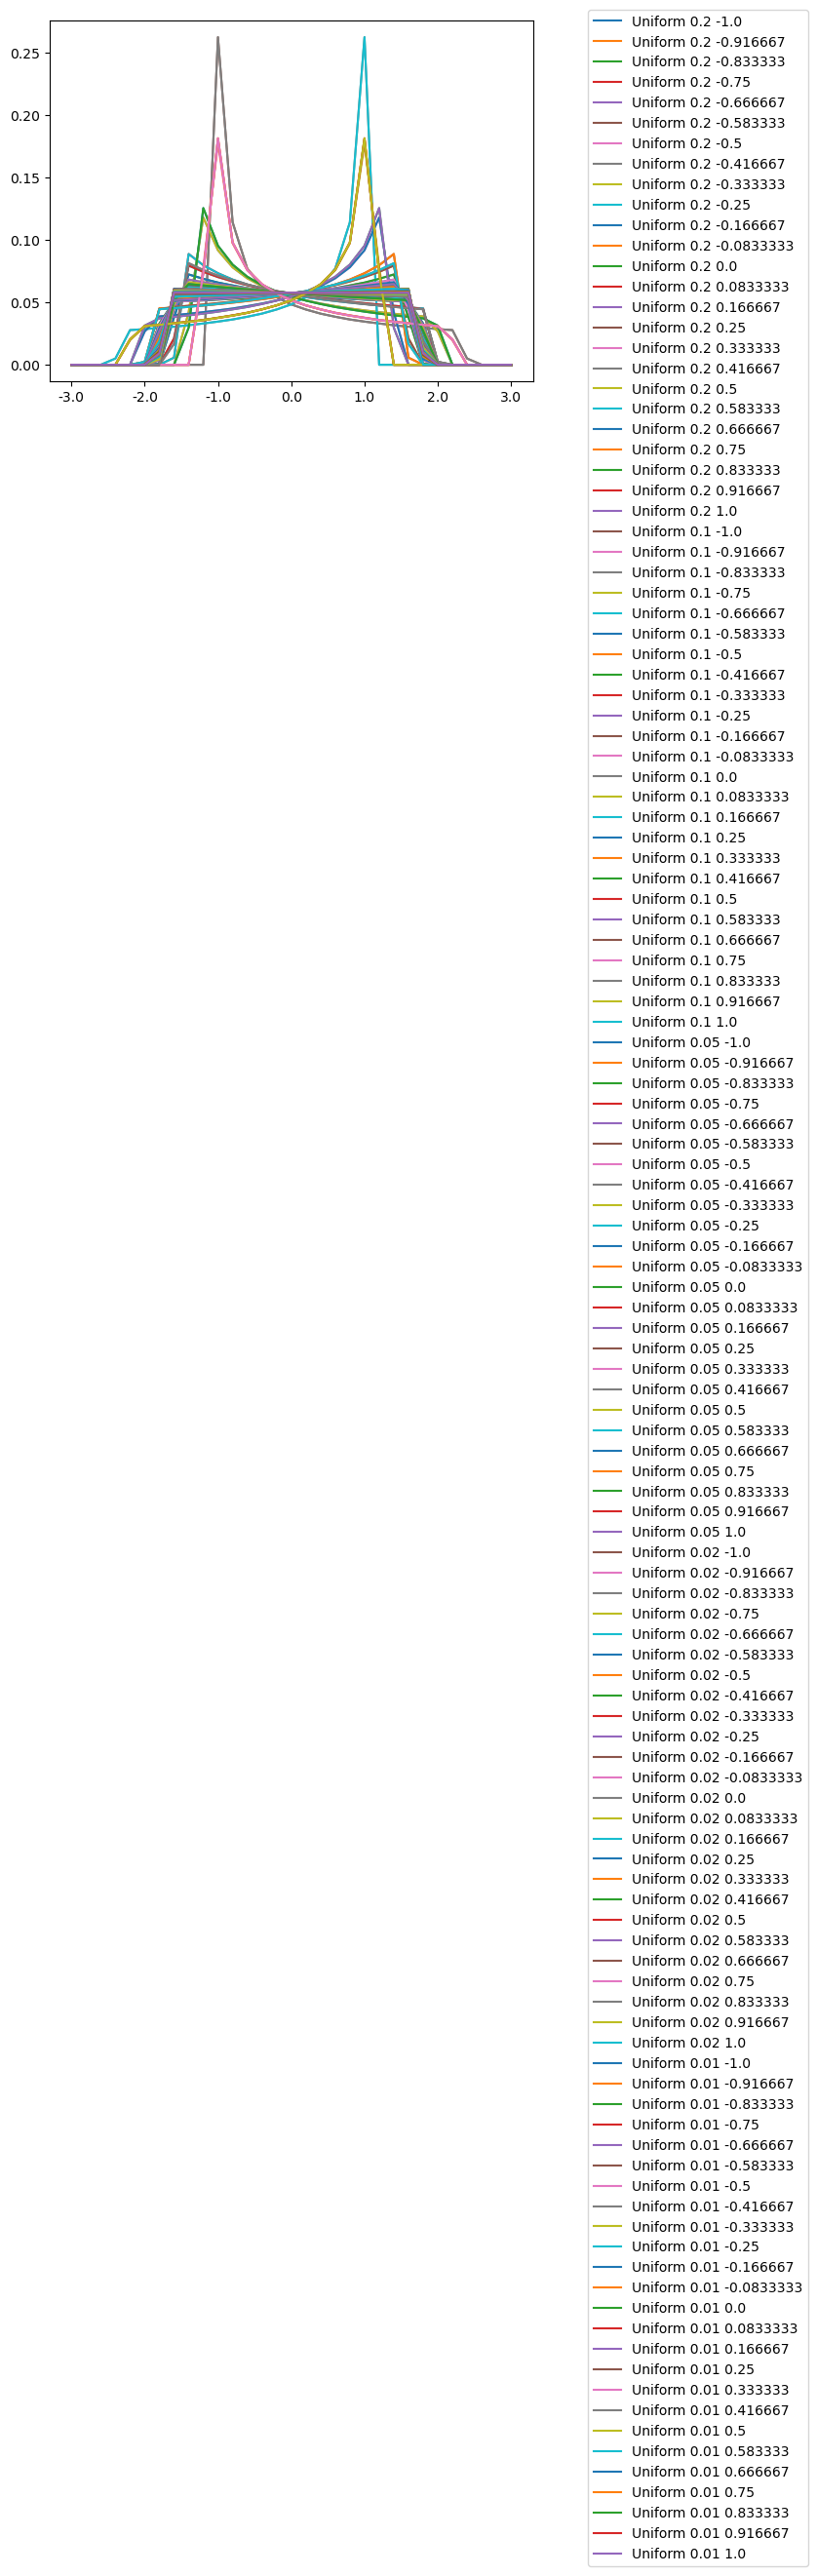

In [15]:
PlotHisto()

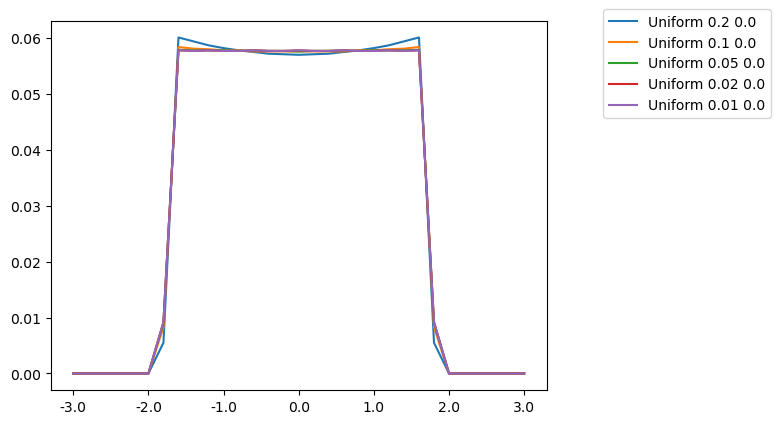

In [16]:
PlotHisto(sX=[0])

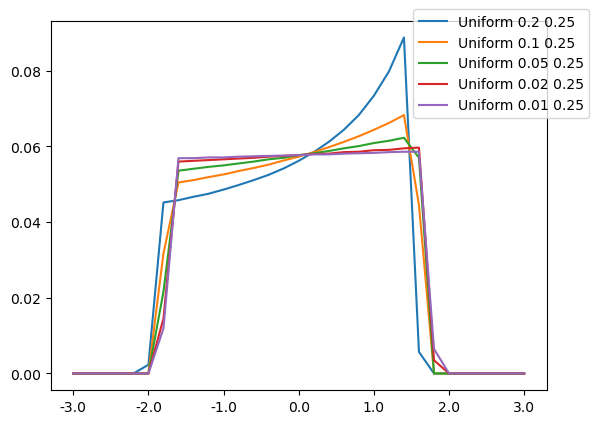

In [17]:
PlotHisto(sX=[0.25])

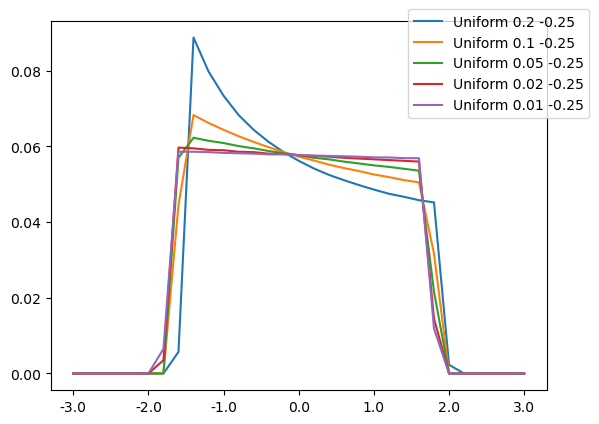

In [18]:
PlotHisto(sX=[-0.25])

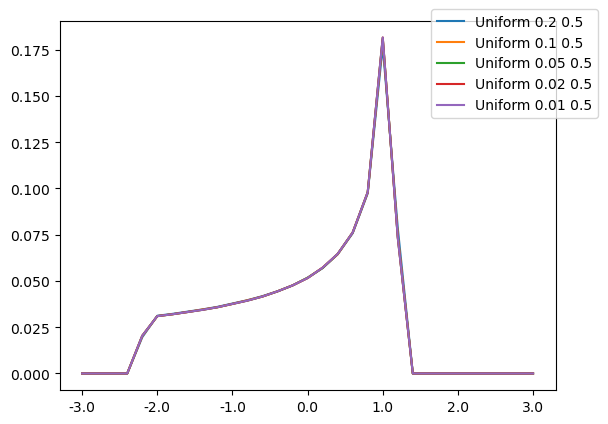

In [19]:
PlotHisto(sX=[0.5])

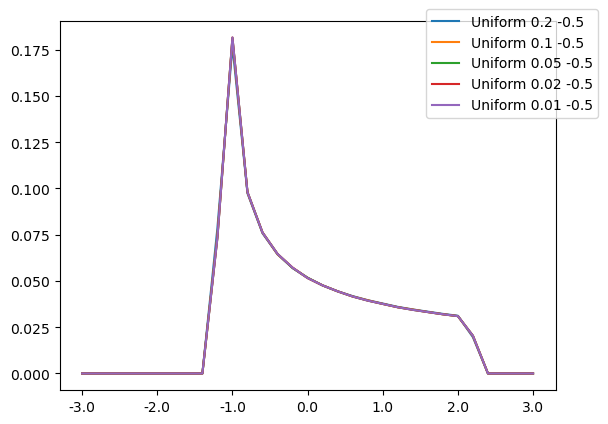

In [20]:
PlotHisto(sX=[-0.5])

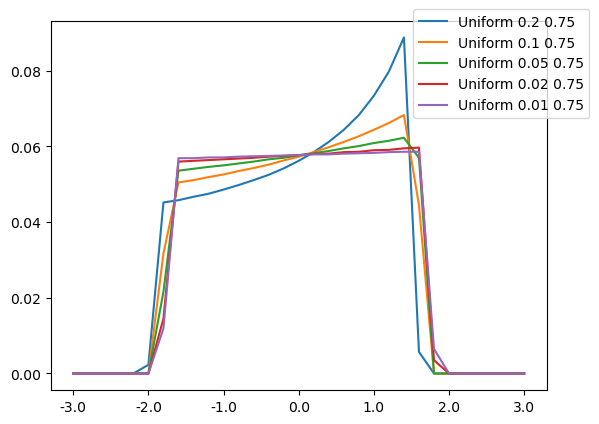

In [21]:
PlotHisto(sX=[0.75])

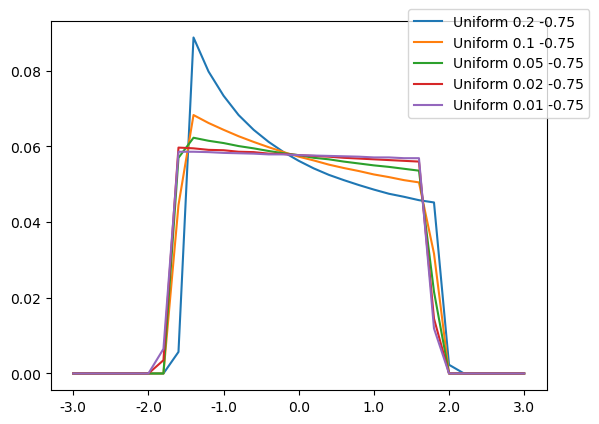

In [22]:
PlotHisto(sX=[-0.75])

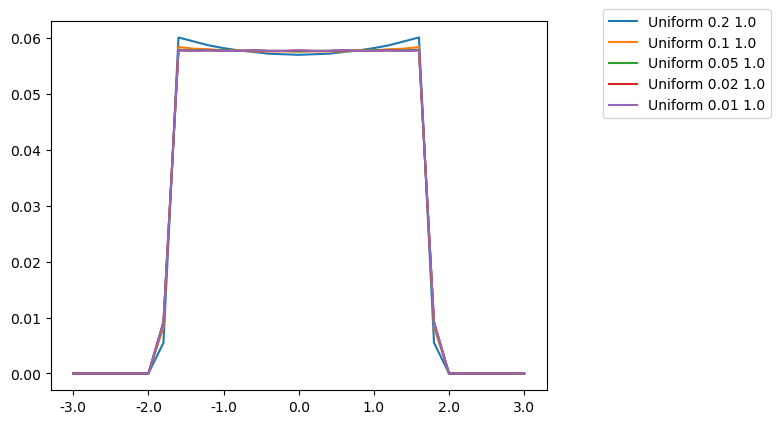

In [23]:
PlotHisto(sX=[+1])

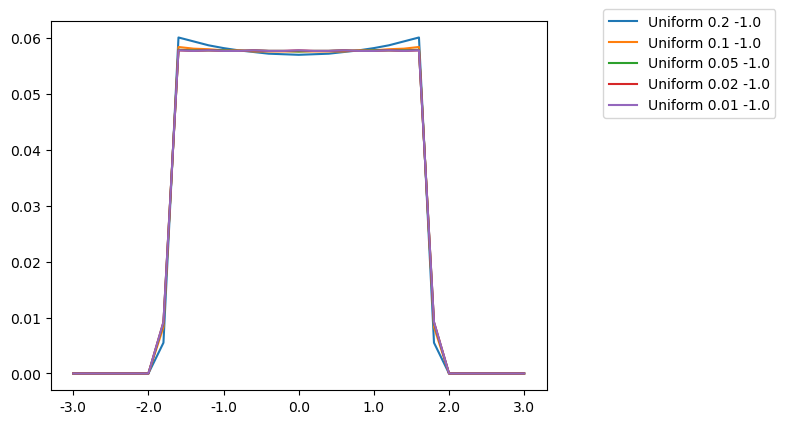

In [24]:
PlotHisto(sX=[-1])